In [1]:
import numpy as np
from numpy import cos, sin, exp, log, log10, sqrt, absolute, pi
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from spectral_tools import Vandermonde, Decompose, FilterCoeff, EdgeDetectI, EdgeDetectII, ModalD, NodalD
from numpy.polynomial import chebyshev as T
from edgedetect import ConfigurePlots

# Task 1: Analytical vs matrix-calculated derivative for N=6

Define the polynomial of order 6 and decompose it into Chebyshev coefficients using Vandermonde and Decompose functions

In [14]:
c2s, s2c = Vandermonde(6)
polynomial = lambda x: 1 + x + x**2+ x**3 + x**4 + x**5 + x**6
a_n = Decompose(polynomial, 6, c2s)


Compute analytical derivative and Nodal Derivative Matrix to check for error magnitude

In [15]:
derivative = lambda x: 1 + 2*x + 3*(x**2) + 4*(x**3) + 5*(x**4) + 6*(x**5)
derivative = np.frompyfunc(derivative, 1, 1)
polynomial = np.frompyfunc(polynomial, 1, 1)
nodalD = NodalD(6, c2s, s2c)

x_j = T.Chebyshev.basis(7).roots()
u_j = polynomial(x_j)



In [16]:
analytical = derivative(x_j)

In [17]:
computed = np.dot(nodalD, u_j)

In [18]:
error = absolute(analytical-computed)

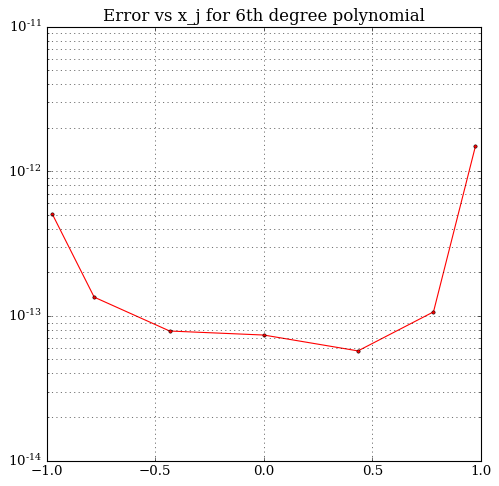

In [19]:
ConfigurePlots()
fig, ax = plt.subplots(figsize=(7,7))
plt.title('Error vs x_j for 6th degree polynomial')
plt.xlim(-1,1)
plt.semilogy(x_j, error, 'ro-')
plt.grid(True, which='both')
plt.show()

<p style="background-color:GreenYellow;">
<i><b>Comment:</b> is this close enough to machine precision Jonah?<br>
Also: why is it uneven? Shouldn't the error be even around x=0.0?</i>
</p>

# Task 2: Differentiate a Gaussian and vary N [2,32]

Using sigma scaled such that the Gaussian almost vanishes at +-0.5

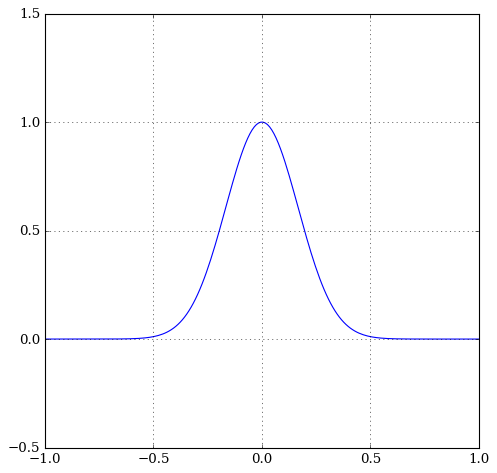

In [20]:
sigma = 0.5/3.0
mu = 0.0 #centered on x=0.0
gauss = lambda x: exp(-(x-mu)**2/(2.0*(sigma**2)))
gauss_v = np.frompyfunc(gauss, 1, 1)
x = np.linspace(-1,1,200)
y_gauss = gauss_v(x)
plt.clf()
plt.plot(x, y_gauss)

Above: Gaussian visualised

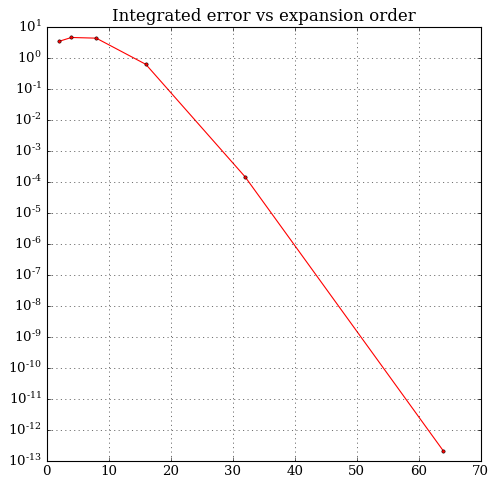

In [28]:
N_val = [2**(i+1) for i in range(6)]
gauss_deriv = lambda x: -((x-mu)/sigma**2)*exp(-(x-mu)**2/(2.0*(sigma**2)))
gauss_deriv = np.frompyfunc(gauss_deriv, 1, 1)
err_N = np.empty(len(N_val))

for idx, N in enumerate(N_val):
    w_j = pi/(N+1)*np.ones(N+1)
    x_j = T.Chebyshev.basis(N+1).roots()
    c2s, s2c = Vandermonde(N)
    nodalD = NodalD(N, c2s, s2c)
    gauss_j = gauss_v(x_j)
    analytical = gauss_deriv(x_j)
    computed = np.dot(nodalD, gauss_j)
    error = absolute(analytical-computed)
    err = sqrt(np.sum((error**2)*w_j))
    err_N[idx] = err
 
#plot the result

plt.clf()
plt.title('Integrated error vs expansion order')
plt.semilogy(N_val, err_N, 'ro-')
plt.show()

<p style="background-color:GreenYellow;">
<i><b>Comment:</b> does the above look correct? Should it not decrease exponentially from the very beginning?</i></p>